# Experiment on correlation between cycles

In [1]:
# %matplotlib notebook
import sys

import scipy.stats as st
import statsmodels.api as sm

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline


# useful utilities
# -----------------------
sys.path.append("./modules")
import utils
import PDplot
from PDplot import ALPHA, RIPS
# -----------------------



# Visual fine tuning
# -----------------------
sns.set_theme(style="darkgrid")
DPI = 300
FN_TITLE = 30
FN_AXES = 24
FN_LEGEND = 12

In [2]:
# Load files
# -----------------------
# each row is a generated persistence diagram
# with M persistence values sampled uniformly at random
# without replacement
pbx = np.load('./independence_files/boxiid.npy')
pbm = np.load('./independence_files/browniid.npy')

# number of runs used
N = 100000
# number of sampled classes in each
# persistence diagram
M = 100
pbx = pbx[:,:M]
pbm = pbm[:,:M]
pbm = pbm[:N,:]
print(pbx.shape)
print(pbm.shape)

(100000, 100)
(100000, 100)


In [3]:
#  Take log log
# ---------------
lpbx = np.log(np.log(pbx))
lpbm = np.log(np.log(pbm))

# comparison - iid gumbel
lpiid = st.gumbel_l().rvs((N,M))

In [4]:
# number of samples we use
K = 25
lpbx = lpbx[:,:K]
lpbm = lpbm[:,:K]
lpiid = lpiid[:,:K]

# compute covariance
cbx = np.cov(np.transpose(lpbx))
cbm = np.cov(np.transpose(lpbm))
ciid = np.cov(np.transpose(lpiid))

# compute correlation coefficients
ccbx = np.corrcoef(np.transpose(lpbx))
ccbm = np.corrcoef(np.transpose(lpbm))
cciid = np.corrcoef(np.transpose(lpiid))

# remove diagonal 
zccbx = np.abs(ccbx-np.eye(K))
zccbm = np.abs(ccbm-np.eye(K))
zcciid = np.abs(cciid-np.eye(K))

# print out statistics
print(zccbx.max())
print(zccbm.max())
print(zcciid.max())

print(zccbx.mean())
print(zccbm.mean())
print(zcciid.mean())

0.008878097998858393
0.011396963533187454
0.01318507034906439
0.0023365358113305802
0.0024837865603576995
0.0026208662590504125


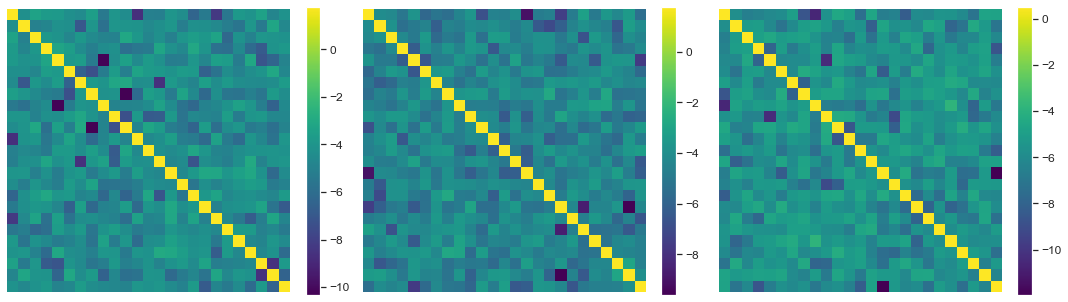

In [5]:
# Plot correlation matrices
#----------------------------
# plot 1 - points in a box 
# plot 2 - points sampled from brownian motion
# plot 3 - samples drawn iid from LGumbel

fig = plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(cbx)), cmap='viridis')
cb = plt.colorbar(fraction=0.046)
cb.ax.tick_params(labelsize=12)
plt.axis('off');

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(cbm)), cmap='viridis')
cb = plt.colorbar(fraction=0.046)
cb.ax.tick_params(labelsize=12)
plt.axis('off');

plt.subplot(1,3,3)
im = plt.imshow(np.log(np.abs(ciid)), cmap='viridis')
cb = plt.colorbar(fraction=0.046)
cb.ax.tick_params(labelsize=12)
plt.axis('off');

plt.tight_layout()
plt.savefig('cov_bx_bm_iid', dpi=DPI)

# Distance correlation

In [6]:
# compute distance correlation
# ------------------------------
# once computed - one can just load
# dcov_matrices.npy - but for recomputing from the above 
# the code below can be run.


# import dcor
# dcov_bx = np.zeros((K,K))
# dcor_bx = np.zeros((K,K))
# dcov_bm = np.zeros((K,K))
# dcor_bm = np.zeros((K,K))
# dcov_iid = np.zeros((K,K))
# dcor_iid = np.zeros((K,K))

# for k in range(K):
#     print(k)
#     for l in range(k,K):
#         dc = dcor.distance_covariance(lpbx[:,k],lpbx[:,l])
#         dcov_bx[k,l] = dc
#         dcov_bx[l,k] = dc
        
#         dc = dcor.distance_covariance(lpbm[:,k],lpbm[:,l])
#         dcov_bm[k,l] = dc
#         dcov_bm[l,k] = dc

#         dc = dcor.distance_covariance(lpiid[:,k],lpiid[:,l])
#         dcov_iid[k,l] = dc
#         dcov_iid[l,k] = dc

#         if k==l:
#             continue
#         dc = dcor.distance_correlation(lpbx[:,k],lpbx[:,l])
#         dcor_bx[k,l] = dc
#         dcor_bx[l,k] = dc
            
#         dc = dcor.distance_correlation(lpbm[:,k],lpbm[:,l])
#         dcor_bm[k,l] = dc
#         dcor_bm[l,k] = dc

#         dc = dcor.distance_correlation(lpiid[:,k],lpiid[:,l])
#         dcor_iid[k,l] = dc
#         dcor_iid[l,k] = dc
        
# np.save('dcov_matrices', [dcov_bx, dcov_bm, dcov_iid, dcor_bx, dcor_bm, dcor_iid], allow_pickle=True)

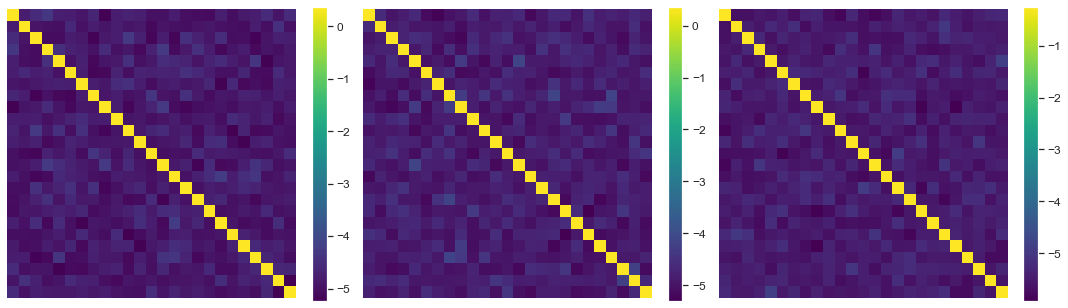

In [7]:
# Load values
#-------------
[dcov_bx, dcov_bm, dcov_iid, dcor_bx, dcor_bm, dcor_iid] = np.load('./independence_files/dcov_matrices.npy', allow_pickle=True)


# plotting
#---------------
fig = plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(dcov_bx)), cmap='viridis')
cb = plt.colorbar(fraction=0.046)
cb.ax.tick_params(labelsize=12)
plt.axis('off');

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(dcov_bm)), cmap='viridis')
cb = plt.colorbar(fraction=0.046)
cb.ax.tick_params(labelsize=12)
plt.axis('off');

plt.subplot(1,3,3)
im = plt.imshow(np.log(np.abs(dcov_iid)), cmap='viridis')
cb = plt.colorbar(fraction=0.046)
cb.ax.tick_params(labelsize=12)
plt.axis('off');
plt.tight_layout()
plt.savefig('dcov_bx_bm_iid', dpi=DPI)

In [8]:
# Statistics of distance correlation
#------------------------------------
print(np.max(dcor_bx))
print(np.max(dcor_bm))
print(np.max(dcor_iid))
print(np.mean(dcor_bx))
print(np.mean(dcor_bm))
print(np.mean(dcor_iid))

0.01002881952721298
0.011280578299648718
0.009991119249380823
0.005357959062834122
0.00540852606114537
0.005253451730204158
